In [98]:
# Import all necessary libraries.
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import math  
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.special import erfc

from sklearn.neighbors import KNeighborsClassifier



In [99]:
def mod(V):
    ip = np.zeros((len(V),1),dtype=complex)
    inc = 0
    for v in V:
        if(v==0):
            ip[inc] = -1.0 - 1j*1.0
        elif(v==1):
            ip[inc] = -1.0 + 1j*1.0
        elif(v==2):
            ip[inc] = 1.0 - 1j*1.0
        else:
            ip[inc] = 1.0 + 1j*1.0
        inc += 1
    # Normalization of energy to 1.
    s = (1/np.sqrt(2))*ip;
    return s


def demod(c):
    c_seq = mod(np.array([0,1,2,3]))
    c_seq = c_seq[:,0]
    e = []
    for i in range(0,len(c_seq)):
        e.append(np.abs(c_seq[i] - c)**2)
    return e.index(np.min(e))

In [100]:
'''

# Create Es/N0 vector.
EsN0dB = np.arange(-2,22,2)

ser_simu = np.zeros(len(EsN0dB))
ser_theo = np.zeros(len(EsN0dB))

n_clusters=2
km_re = KMeans(n_clusters=n_clusters)

km_im = KMeans(n_clusters=n_clusters)

ber_theo = ber_simu = np.zeros(len(EsN0dB))
for idx in range(0,len(EsN0dB)):    

    print('Es/N0 dB:', EsN0dB[idx])
    
    EsN0Lin = 10.0**(-(EsN0dB[idx]/10.0))
    
    # Generate N binary symbols.
    V = np.random.randint(0,4,(N,1))
    
    
    # Modulate binary stream into QPSK symbols.
    s = mod(V)
    
    
    # Generate noise vector. 
    # Divide by two once the theoretical ber uses a complex Normal pdf with variance of each part = 1/2.
    noise = np.sqrt(1.0/2.0)*(np.random.randn(N, 1) + 1j*np.random.randn(N, 1))
   

    # Pass symbols through AWGN channel.
    y = s + np.sqrt(EsN0Lin)*noise
    
    Y = np.c_[y.real, y.imag]
    
    # Fit models for real and imaginary parts.
    km = KMeans(n_clusters=4, random_state=42)
    km.fit(Y)
    
    # Prediction.
    detected = km.labels_
    
    # Simulated QPSK BER.
    error = 0
    for i in range(0, len(V)):
        print(i,pred)
        pred = km.cluster_centers_[detected[i],0] + 1j*km.cluster_centers_[detected[i],1]
        d = demod(pred)
        if((V[i,0] != d)==True): 
            error = error + 1
    
    ser_simu[idx] = 1.0 * error / len(V)
    
    # Theoretical BPSK BER.    
    ser_theo[idx] = erfc( np.sqrt(  0.5*(10.0**(EsN0dB[idx]/10.0))   ) ) - (1/4)*(erfc(np.sqrt(0.5*(10.0**(EsN0dB[idx]/10.0)))))**2.0;
'''

"\n\n# Create Es/N0 vector.\nEsN0dB = np.arange(-2,22,2)\n\nser_simu = np.zeros(len(EsN0dB))\nser_theo = np.zeros(len(EsN0dB))\n\nn_clusters=2\nkm_re = KMeans(n_clusters=n_clusters)\n\nkm_im = KMeans(n_clusters=n_clusters)\n\nber_theo = ber_simu = np.zeros(len(EsN0dB))\nfor idx in range(0,len(EsN0dB)):    \n\n    print('Es/N0 dB:', EsN0dB[idx])\n    \n    EsN0Lin = 10.0**(-(EsN0dB[idx]/10.0))\n    \n    # Generate N binary symbols.\n    V = np.random.randint(0,4,(N,1))\n    \n    \n    # Modulate binary stream into QPSK symbols.\n    s = mod(V)\n    \n    \n    # Generate noise vector. \n    # Divide by two once the theoretical ber uses a complex Normal pdf with variance of each part = 1/2.\n    noise = np.sqrt(1.0/2.0)*(np.random.randn(N, 1) + 1j*np.random.randn(N, 1))\n   \n\n    # Pass symbols through AWGN channel.\n    y = s + np.sqrt(EsN0Lin)*noise\n    \n    Y = np.c_[y.real, y.imag]\n    \n    # Fit models for real and imaginary parts.\n    km = KMeans(n_clusters=4, random_state

In [104]:
# Number of BPSK symbols to be transmitted.
N = 100




# Create Es/N0 vector.
EsN0dB = np.arange(-2,22,2)

ser_simu = np.zeros(len(EsN0dB))
ser_theo = np.zeros(len(EsN0dB))

ber_theo = ber_simu = np.zeros(len(EsN0dB))
for idx in range(0,len(EsN0dB)):    

    print('Es/N0 dB:', EsN0dB[idx])
    
    EsN0Lin = 10.0**(-(EsN0dB[idx]/10.0))
    
    # Generate N binary symbols.
    V = np.random.randint(0,4,(N,1))
    
    
    # Modulate binary stream into QPSK symbols.
    s = mod(V)
    
    
    # Generate noise vector. 
    # Divide by two once the theoretical ber uses a complex Normal pdf with variance of each part = 1/2.
    noise = np.sqrt(1.0/2.0)*(np.random.randn(N, 1) + 1j*np.random.randn(N, 1))
    


    # Pass symbols through AWGN channel.
    y = s + np.sqrt(EsN0Lin)*noise
    
    Y = np.c_[y.real, y.imag]
    
    
    
    # Fit models for real and imaginary parts.
    km = KNeighborsClassifier(n_neighbors=4)

    #km.fit(x_train, y_train)
    km.fit(Y,V[:,0])
    print(V[:,0])
    # Prediction.
    detected = km.predict(Y)
    
    # Simulated QPSK BER.
    error = 0
    for i in range(0, len(V)):
        #pred = V[detected[i]]
        #print(pred)
        #d = demod(pred)
        if((V[i,0] != detected[i])==True): 
            error = error + 1
    
    ser_simu[idx] = 1.0 * error / len(V)
    
    # Theoretical BPSK BER.    
    ser_theo[idx] = erfc( np.sqrt(  0.5*(10.0**(EsN0dB[idx]/10.0))   ) ) - (1/4)*(erfc(np.sqrt(0.5*(10.0**(EsN0dB[idx]/10.0)))))**2.0;
    

Es/N0 dB: -2
[2 2 0 3 1 0 2 1 2 3 2 2 3 1 3 3 1 0 0 1 2 2 1 1 3 0 2 2 0 2 2 1 3 1 0 0 3
 1 3 3 1 1 3 0 2 3 3 0 3 0 0 2 0 2 1 3 0 3 2 2 0 1 3 0 3 0 2 1 3 3 0 2 0 3
 0 3 0 1 3 3 2 1 1 0 1 0 2 2 3 0 2 0 1 2 2 3 1 0 0 0]
Es/N0 dB: 0
[1 0 0 3 0 3 1 0 1 3 0 0 2 3 0 2 2 3 1 2 3 2 1 0 1 2 1 0 1 2 2 0 2 2 2 3 1
 0 2 3 1 2 3 0 3 0 3 1 2 1 3 0 3 2 2 1 3 3 2 1 0 0 1 0 1 3 1 3 2 0 0 3 0 0
 3 0 1 1 2 1 3 2 0 0 3 0 0 1 1 0 3 2 3 3 0 0 1 0 1 2]
Es/N0 dB: 2
[0 1 0 0 2 0 2 2 1 2 3 2 1 0 2 1 2 3 0 2 1 3 1 3 3 2 1 2 3 0 3 3 3 0 2 2 2
 2 0 3 0 0 3 3 2 2 2 3 2 1 2 1 0 2 2 2 0 1 0 0 2 0 1 2 2 1 2 2 2 2 2 2 3 1
 3 0 1 2 0 3 1 1 3 3 2 3 2 3 1 1 1 3 0 2 2 1 3 2 1 2]
Es/N0 dB: 4
[3 0 1 0 3 2 0 2 1 0 3 1 1 3 2 2 1 2 1 2 2 3 2 1 2 1 2 0 1 0 1 0 1 2 0 1 0
 1 1 3 2 3 3 1 1 0 3 3 2 2 1 2 1 0 2 1 3 3 0 0 0 1 1 0 2 0 3 0 2 3 0 2 1 3
 1 1 1 3 1 0 1 2 2 0 0 1 1 0 1 1 0 3 3 3 1 3 0 0 1 2]
Es/N0 dB: 6
[0 3 1 3 1 2 0 1 2 0 1 3 3 3 1 3 2 0 1 1 0 0 0 2 0 1 2 3 0 3 2 0 2 2 3 3 2
 2 0 2 2 1 0 3 2 2 1 2 3 0 0 2 1 2 0 3 3 1 0 1 2

In [102]:
# Print Es/N0 versus SER values.
for i in range(0,len(ser_simu)): print('Es/N0:%d \t- SER: %e' % (EsN0dB[i], ser_simu[i]))

Es/N0:-2 	- SER: 3.400000e-01
Es/N0:0 	- SER: 2.400000e-01
Es/N0:2 	- SER: 1.800000e-01
Es/N0:4 	- SER: 1.800000e-01
Es/N0:6 	- SER: 5.000000e-02
Es/N0:8 	- SER: 1.000000e-02
Es/N0:10 	- SER: 0.000000e+00
Es/N0:12 	- SER: 0.000000e+00
Es/N0:14 	- SER: 0.000000e+00
Es/N0:16 	- SER: 0.000000e+00
Es/N0:18 	- SER: 0.000000e+00
Es/N0:20 	- SER: 0.000000e+00


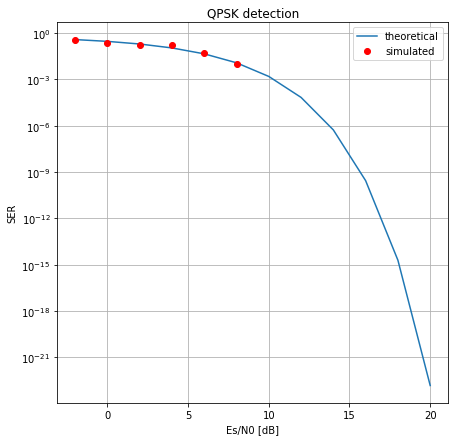

In [103]:
# Plot Es/N0 versus BER values.
fig = plt.figure(figsize=(7,7))
plt.plot(EsN0dB, ser_theo, label='theoretical')
plt.plot(EsN0dB, ser_simu, 'ro', label='simulated')
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('Es/N0 [dB]')
plt.ylabel('SER')
plt.grid(True)
plt.title('QPSK detection')
plt.legend()
#plt.xlim([-10, 10])
#plt.ylim([1e-5, 1])
plt.show()

In [ ]:
'''

# Create Es/N0 vector.
EsN0dB = np.arange(-2,22,2)

ser_simu = np.zeros(len(EsN0dB))
ser_theo = np.zeros(len(EsN0dB))

n_clusters=2
km_re = KMeans(n_clusters=n_clusters)

km_im = KMeans(n_clusters=n_clusters)

ber_theo = ber_simu = np.zeros(len(EsN0dB))
for idx in range(0,len(EsN0dB)):    

    print('Es/N0 dB:', EsN0dB[idx])
    
    EsN0Lin = 10.0**(-(EsN0dB[idx]/10.0))
    
    # Generate N binary symbols.
    V = np.random.randint(0,4,(N,1))
    
    
    # Modulate binary stream into QPSK symbols.
    s = mod(V)
    
    
    # Generate noise vector. 
    # Divide by two once the theoretical ber uses a complex Normal pdf with variance of each part = 1/2.
    noise = np.sqrt(1.0/2.0)*(np.random.randn(N, 1) + 1j*np.random.randn(N, 1))
   

    # Pass symbols through AWGN channel.
    y = s + np.sqrt(EsN0Lin)*noise
    
    Y = np.c_[y.real, y.imag]
    
    
    # Fit models for real and imaginary parts.
    km = KNeighborsClassifier(n_neighbors=4)

    #km.fit(x_train, y_train)
    km.fit(Y,V)
    
    # Prediction.
    print(Y)
    detected = km.predict(Y)
    
    print(detected[0])
    
    # Simulated QPSK BER.
    error = 0
    for i in range(0, len(V)):
        pred = detected[i]
        d = demod(pred)
        if((V[i,0] != d)==True): 
            error = error + 1
    
    ser_simu[idx] = 1.0 * error / len(V)
    
    # Theoretical BPSK BER.    
    ser_theo[idx] = erfc( np.sqrt(  0.5*(10.0**(EsN0dB[idx]/10.0))   ) ) - (1/4)*(erfc(np.sqrt(0.5*(10.0**(EsN0dB[idx]/10.0)))))**2.0;
'''